In [1]:
from sklearn.datasets import fetch_openml #import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False) #fetch dataset

In [3]:
x,y = mnist.data,mnist.target

In [4]:
x #inspection

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

In [8]:
def plot_digit(images, images_in_row=5):
    size = 28
    n_rows = (len(images)-1) // images_in_row + 1

    n_empty = (n_rows*images_in_row) - len(images)
    padded_instances = np.concatenate([images, np.zeros((n_empty, size*size))],axis=0)

    image_grid = padded_instances.reshape((n_rows, images_in_row, size, size))

    big_image = image_grid.transpose(0,2,1,3).reshape(n_rows*size,images_in_row*size)

    plt.imshow(big_image, cmap="binary")
    plt.axis("off")

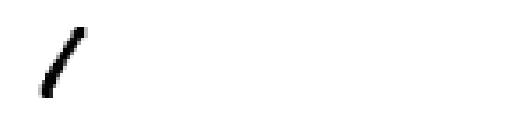

In [9]:
random_int = plot_digit(x[3].reshape(1,-1)) #peek at the image of a random number
plt.show()

In [10]:
x_train,x_test,y_train,y_test = x[:60000], x[60000:], y[:60000], y[60000:]

**Training a model only to classify "8" and "not 8"**

In [11]:
y_train_1 = (y_train == '5')
y_test_1 = (y_test == '5')

In [12]:
print(y_train_1,y_test_1)

[ True False False ...  True False False] [False False False ... False  True False]


In [13]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(x_train,y_train_1)

SGDClassifier()

In [14]:
random_int = x[0]

In [15]:
sgd_model.predict([random_int])

array([ True])

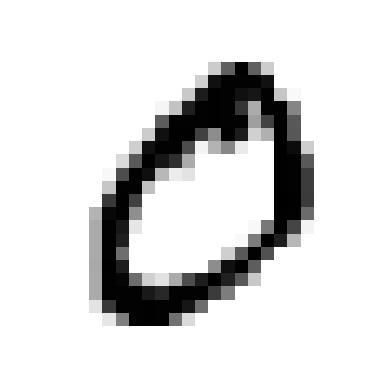

[False]


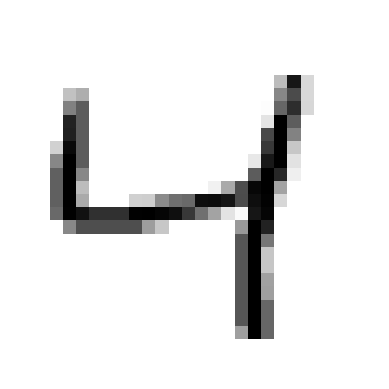

[False]


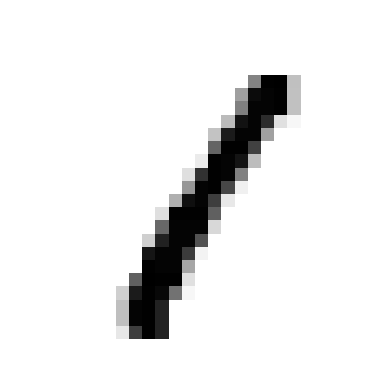

[False]


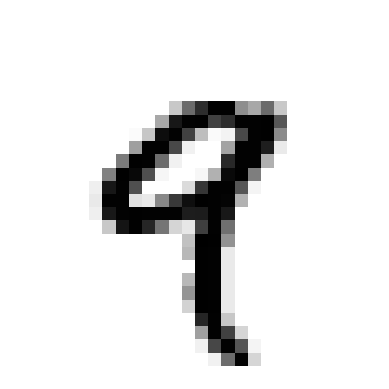

[False]


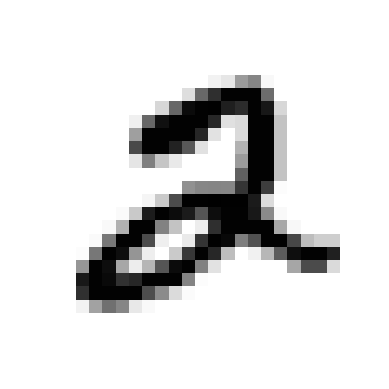

[False]


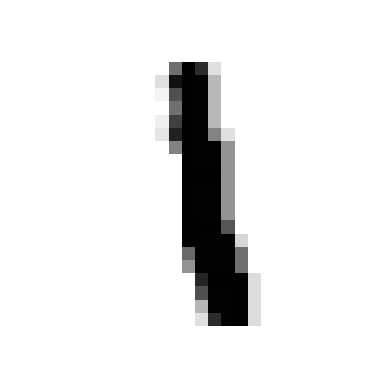

[False]


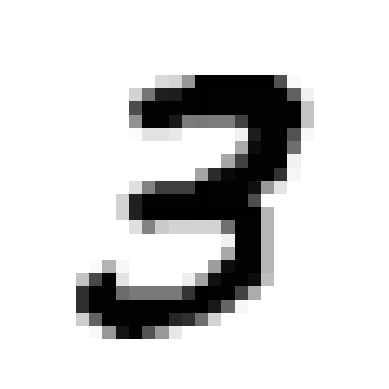

[False]


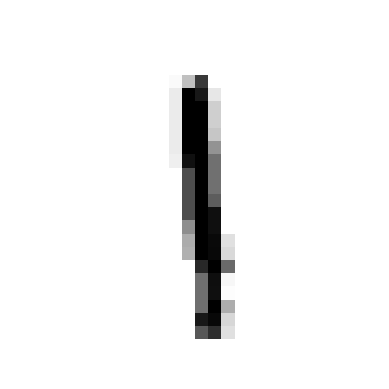

[False]


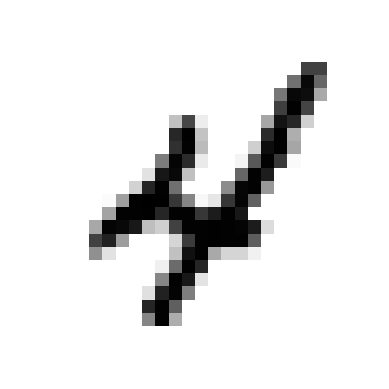

[False]


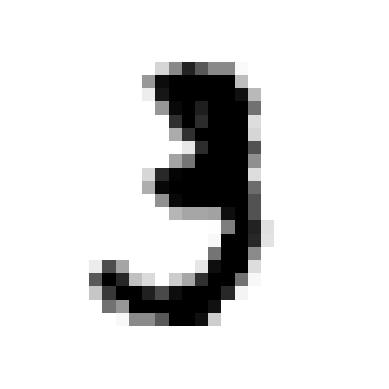

[False]


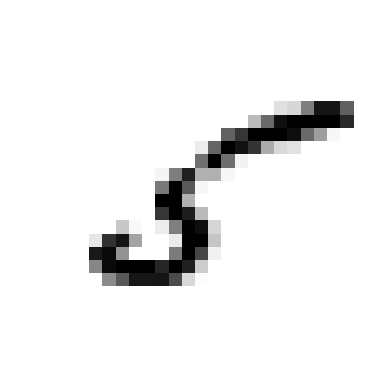

[ True]


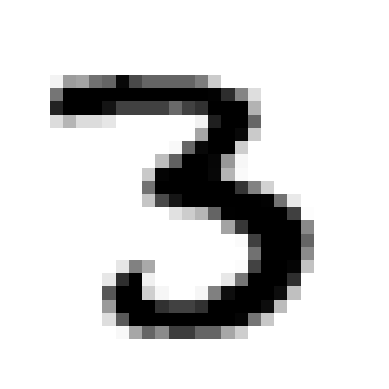

[False]


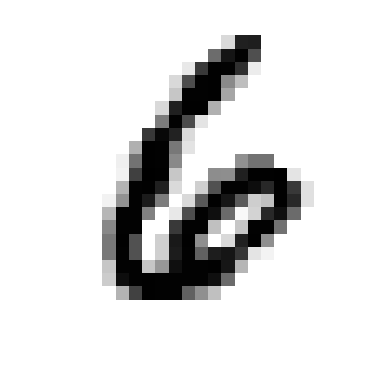

[False]


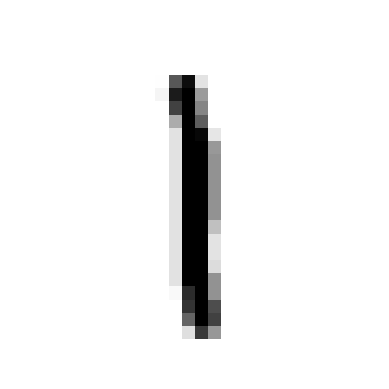

[False]


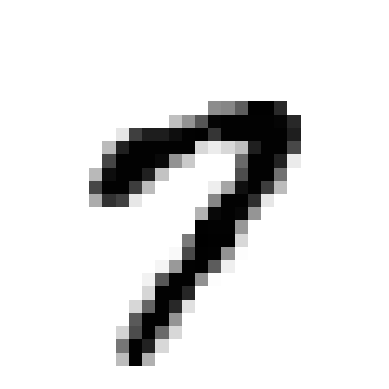

[False]


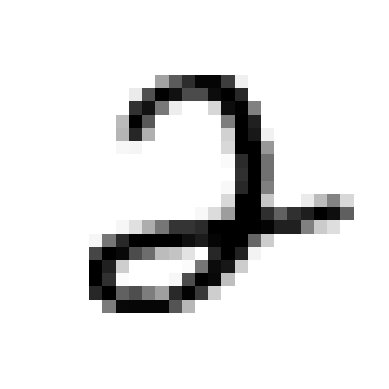

[False]


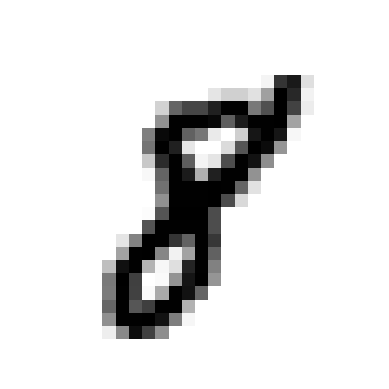

[False]


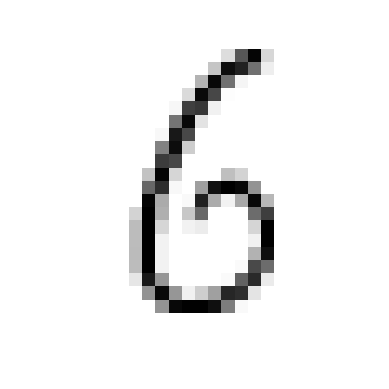

[ True]


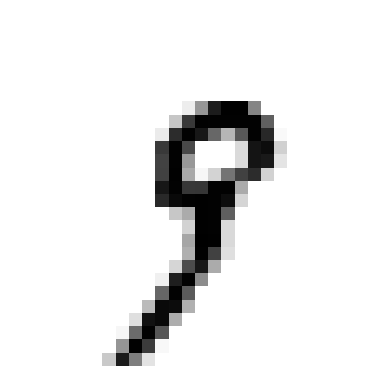

[False]


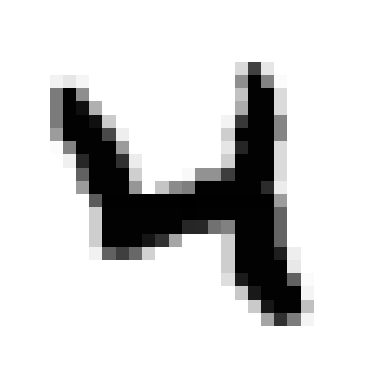

[False]


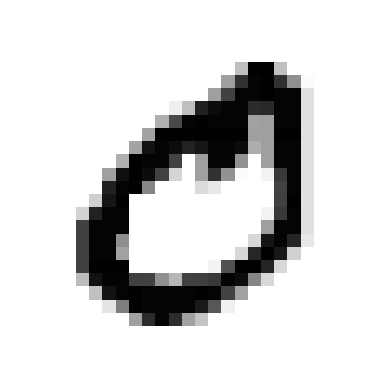

[False]


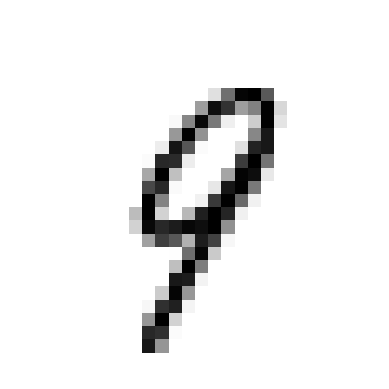

[False]


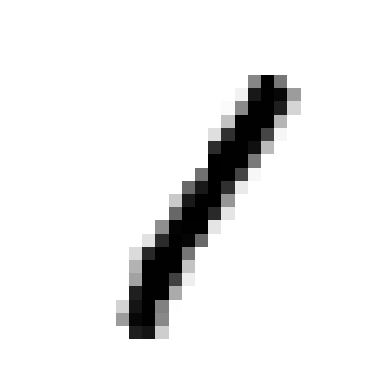

[False]


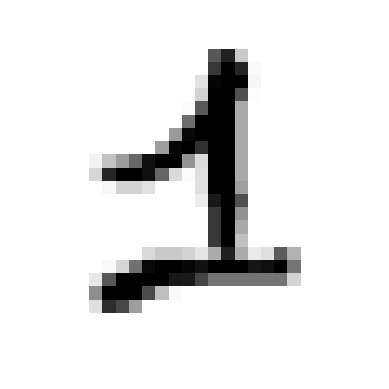

[False]


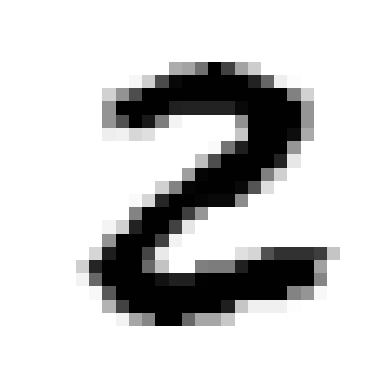

[False]


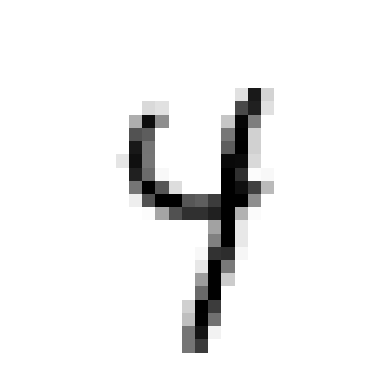

[False]


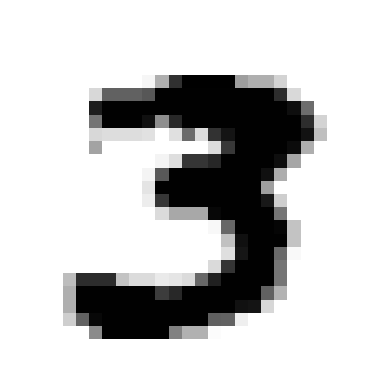

[False]


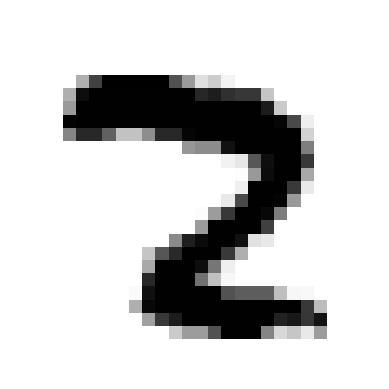

[False]


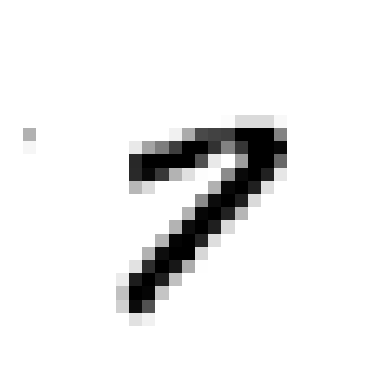

[False]


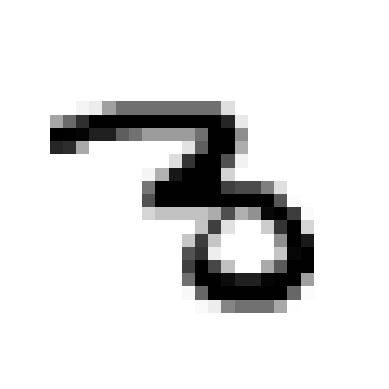

[False]


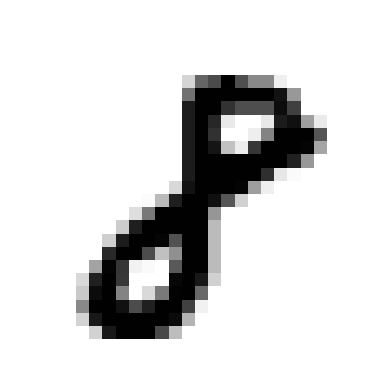

[False]


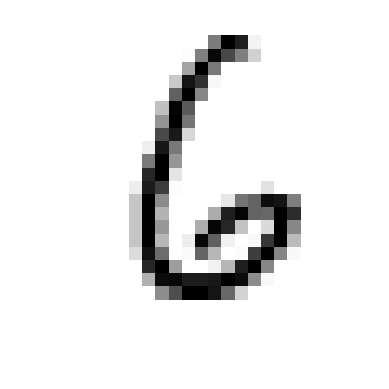

[False]


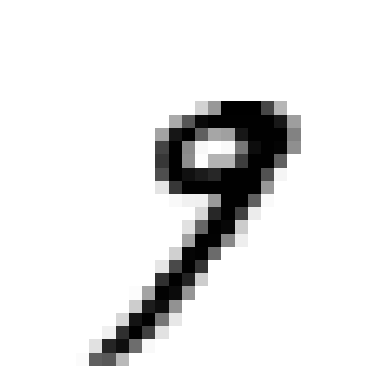

[False]


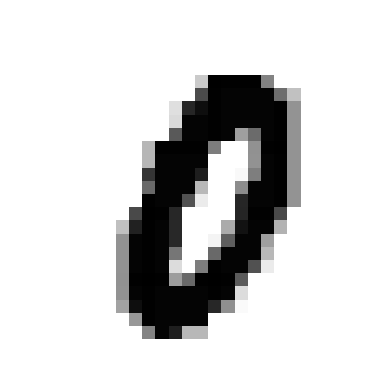

[False]


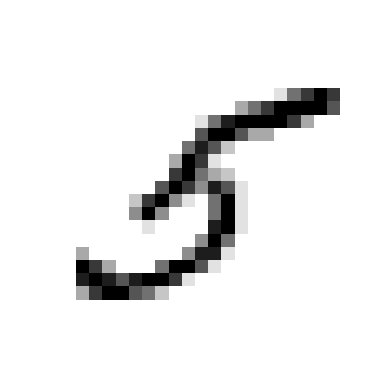

[ True]


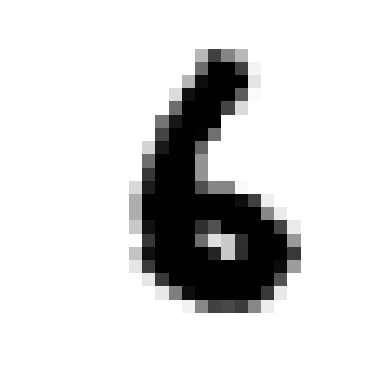

[False]


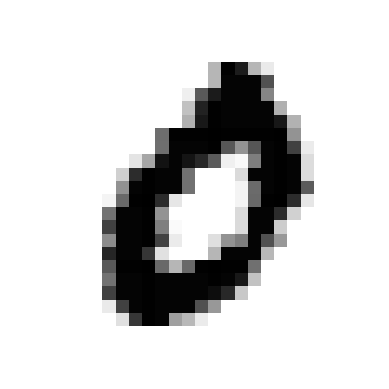

[False]


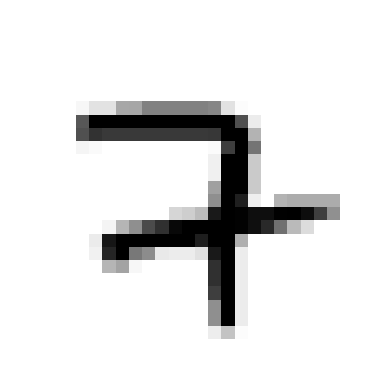

[False]


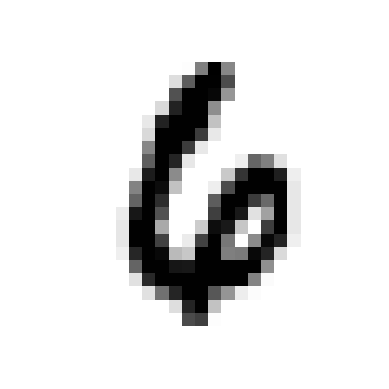

[False]


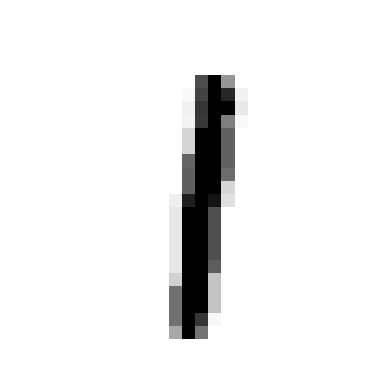

[False]


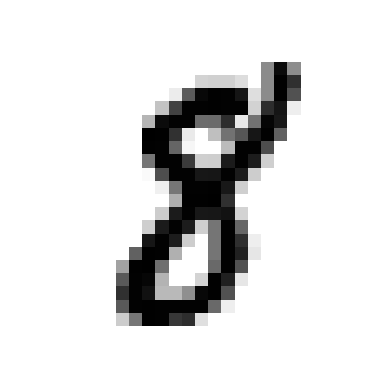

[False]


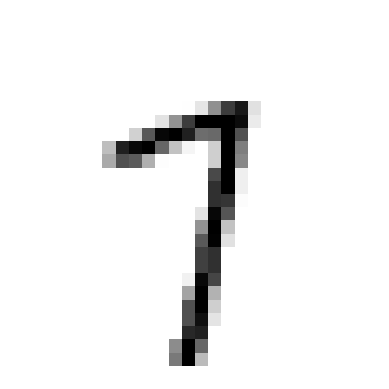

[False]


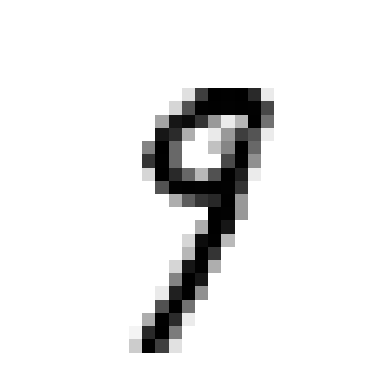

[False]


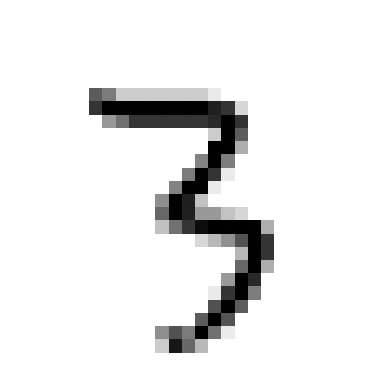

[False]


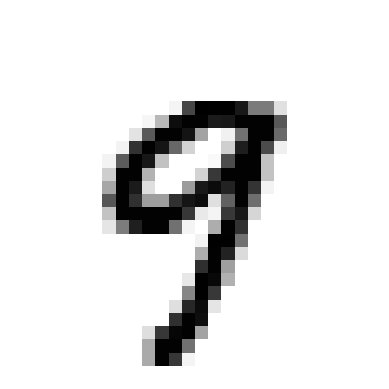

[False]


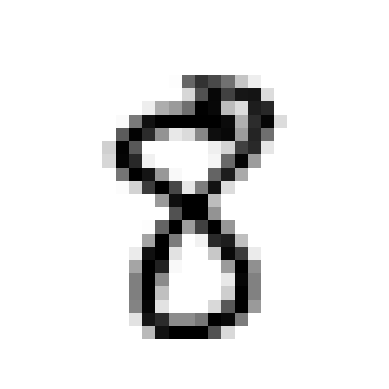

[False]


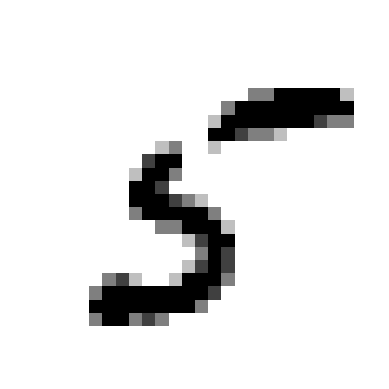

[ True]


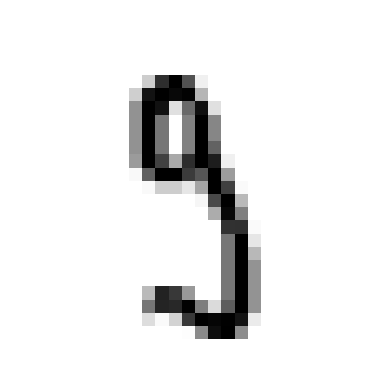

[ True]


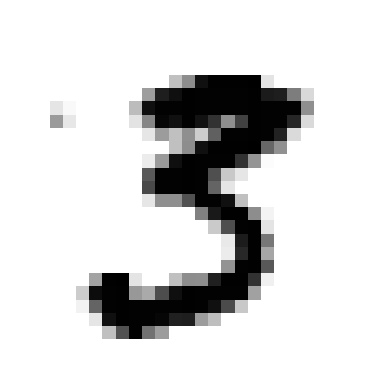

[False]


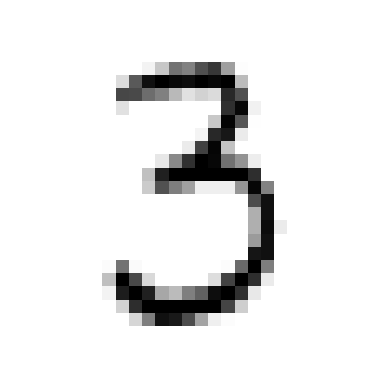

[False]


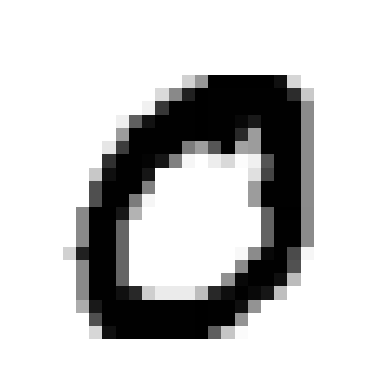

[False]


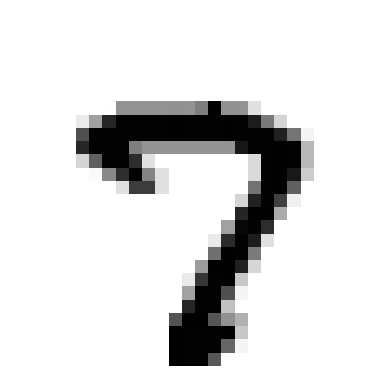

[False]


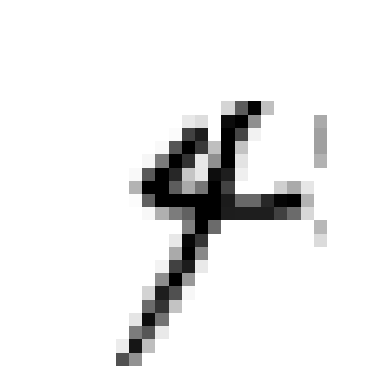

[False]


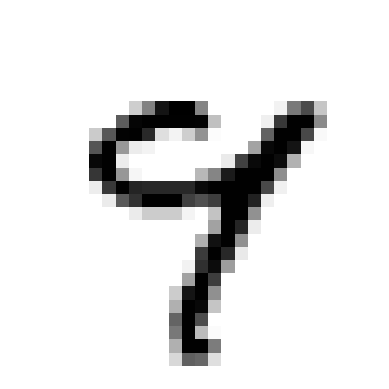

[False]


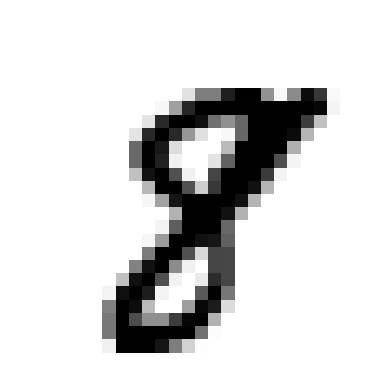

[False]


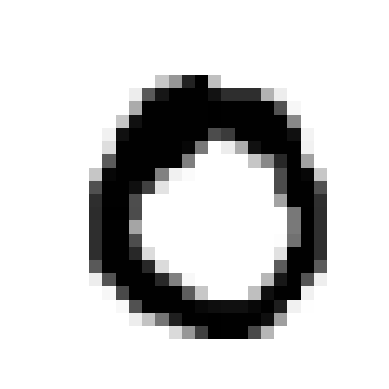

[False]


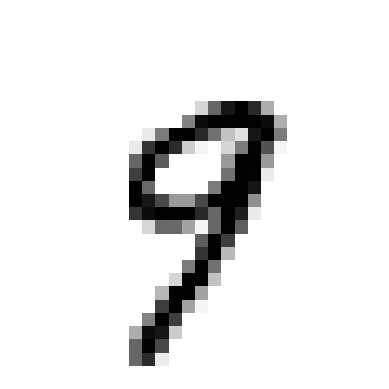

[False]


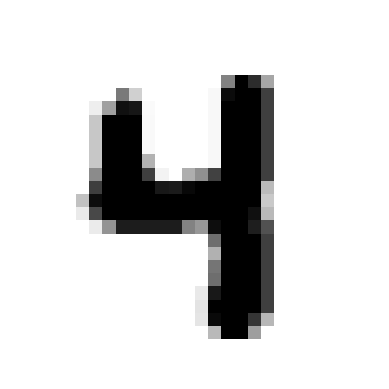

[False]


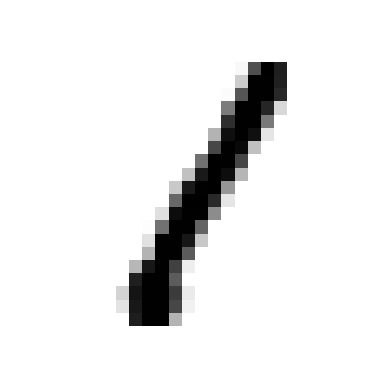

[False]


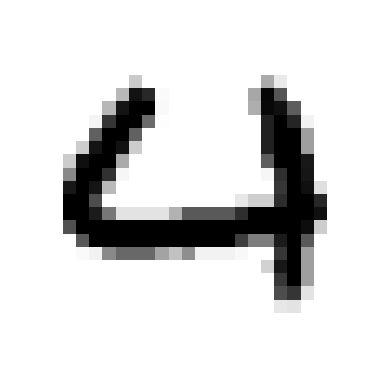

[False]


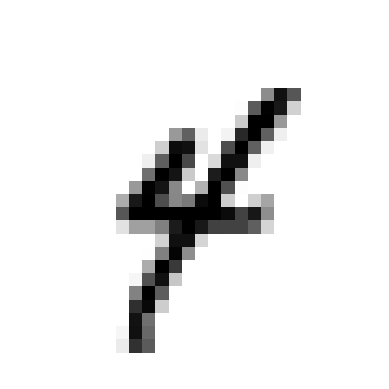

[False]


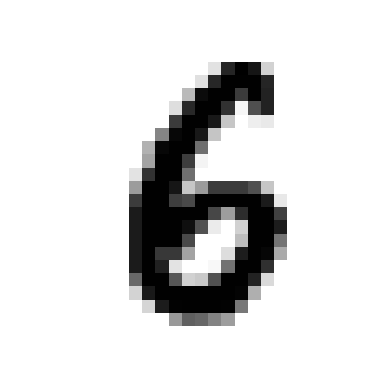

[ True]


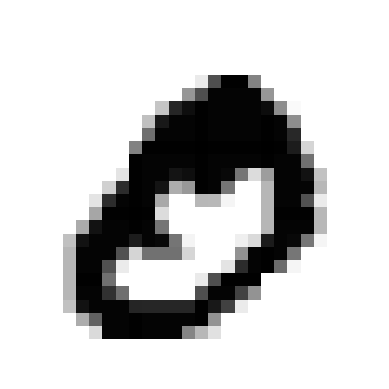

[False]


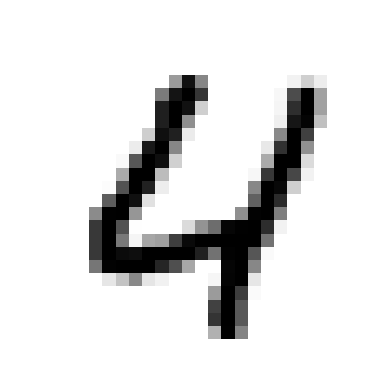

[False]


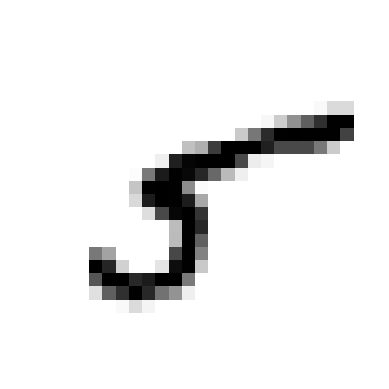

[ True]


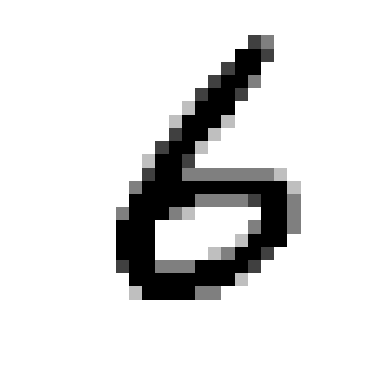

[ True]


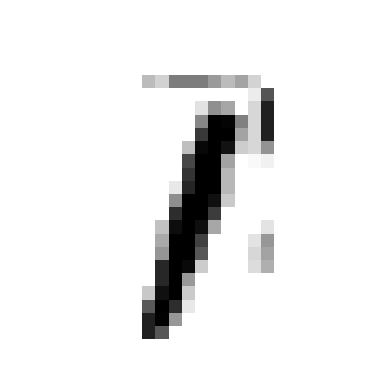

[False]


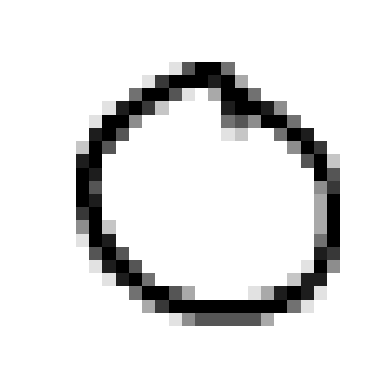

[False]


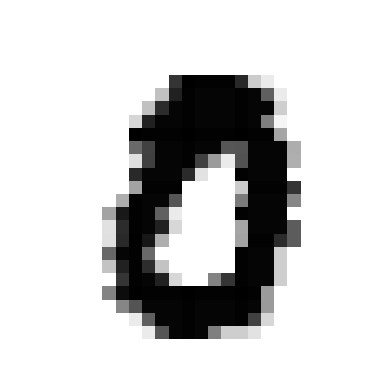

[False]


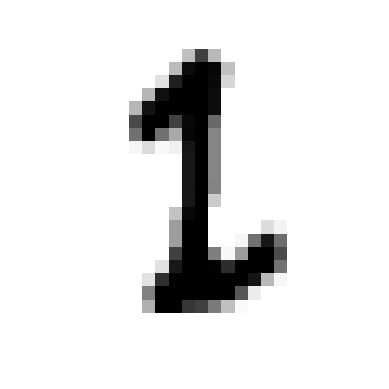

[False]


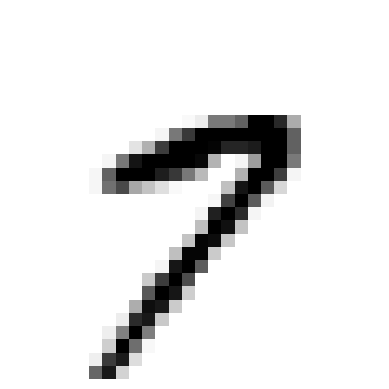

[False]


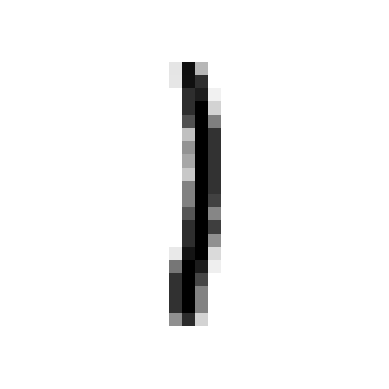

[False]


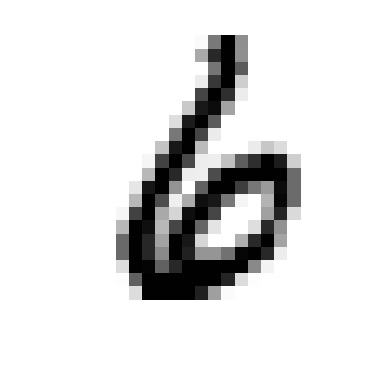

[False]


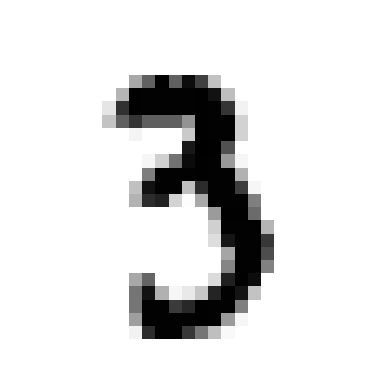

[False]


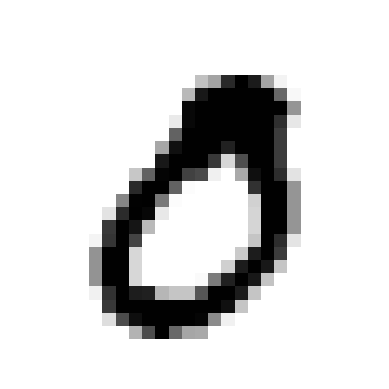

[False]


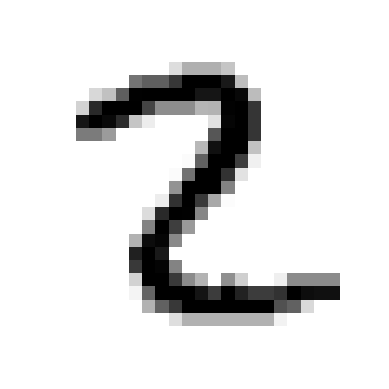

[False]


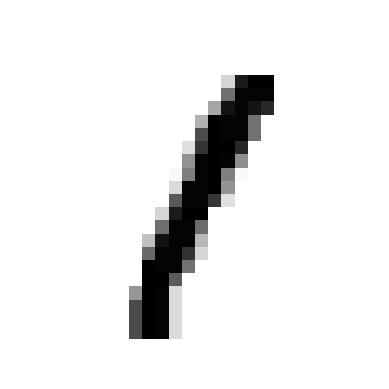

[False]


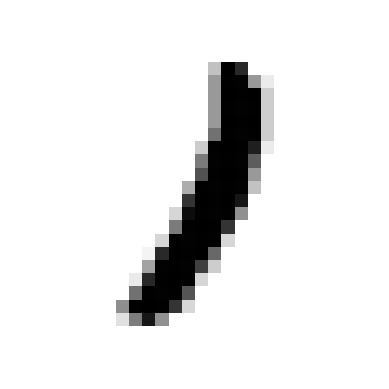

[False]


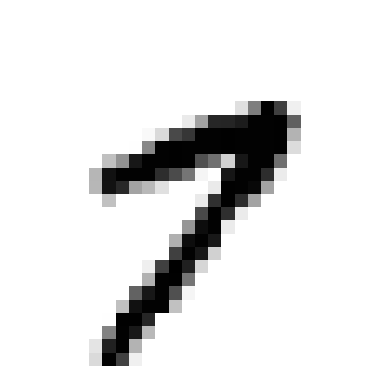

[False]


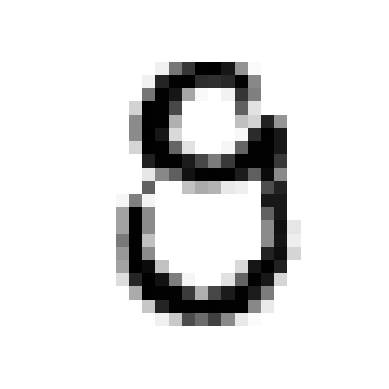

[False]


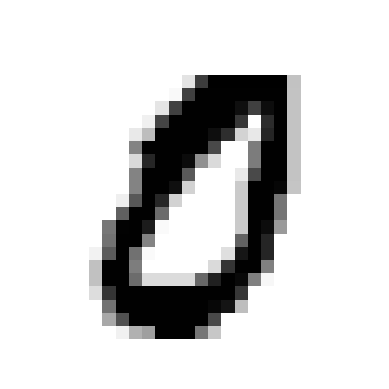

[False]


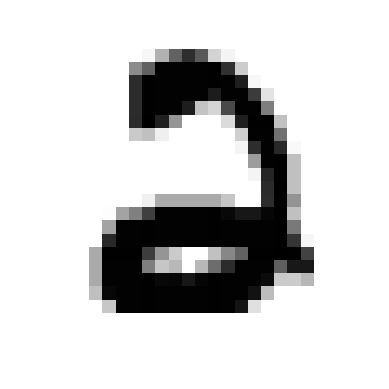

[False]


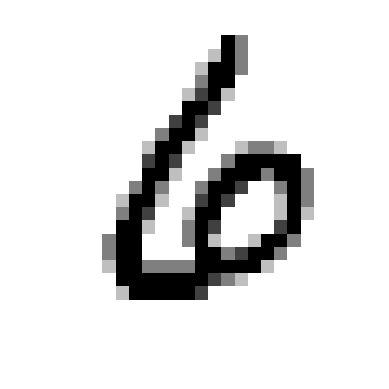

[False]


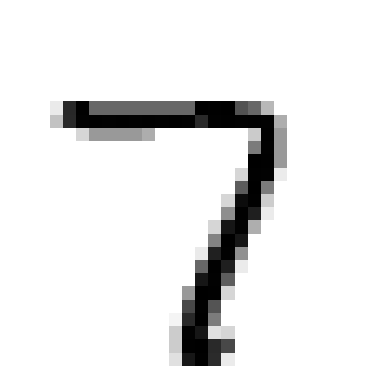

[False]


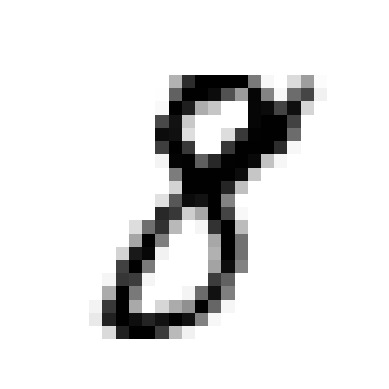

[False]


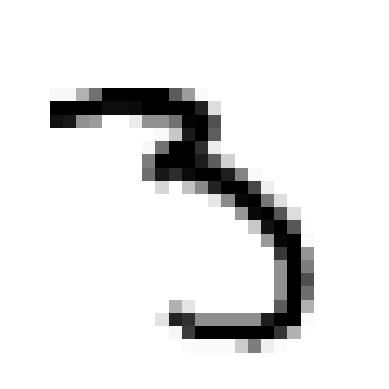

[False]


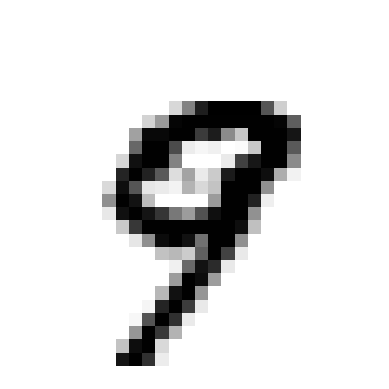

[False]


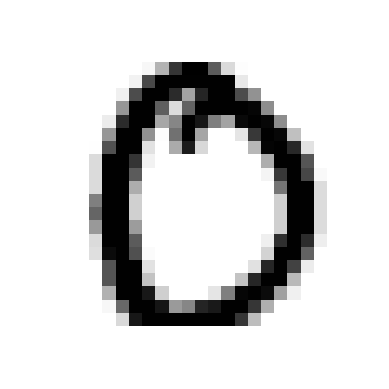

[False]


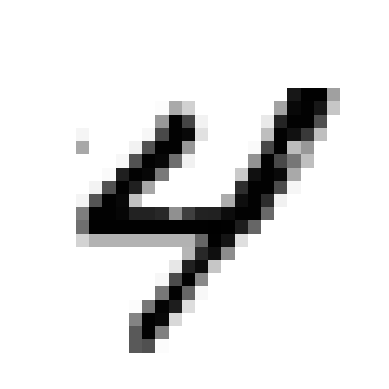

[False]


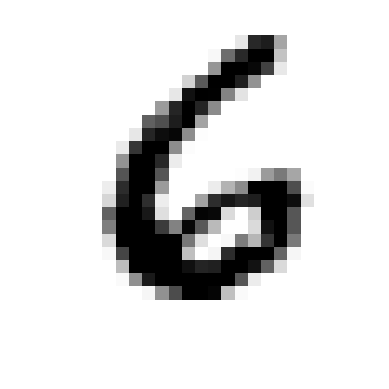

[False]


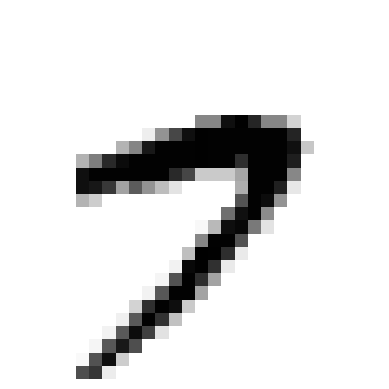

[False]


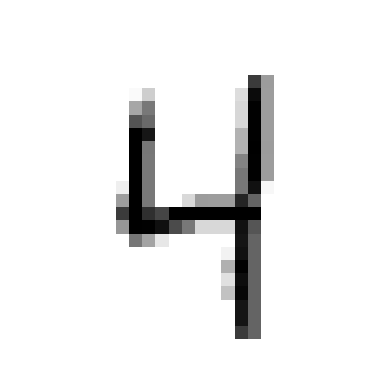

[False]


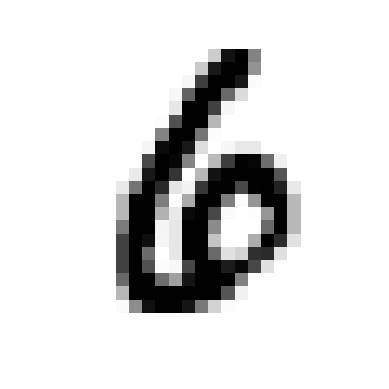

[False]


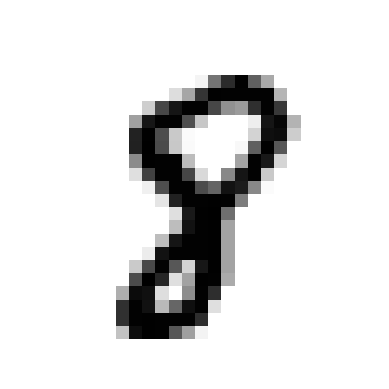

[False]


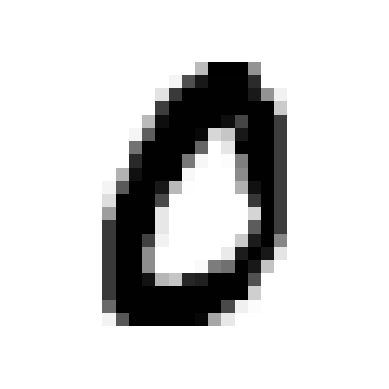

[False]


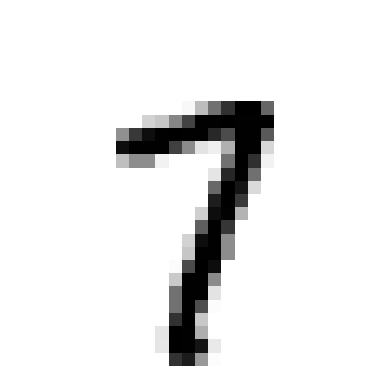

[False]


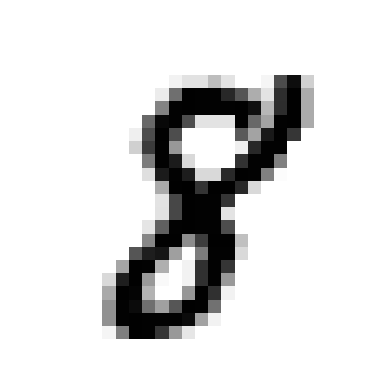

[False]


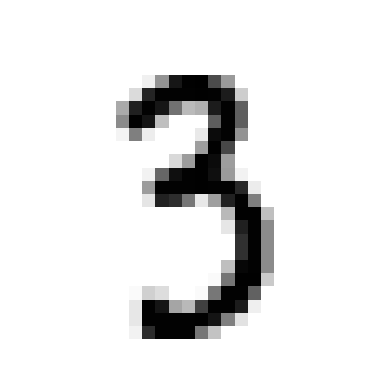

[False]


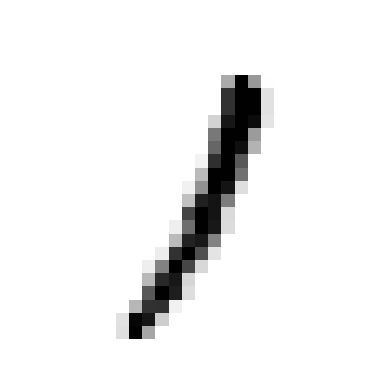

[False]


In [16]:
def plot_single_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

for i in range(1,100,1):
    plot_single_digit(x[i]) #peek at the image of a random number
    plt.show()
    print(sgd_model.predict(x[i].reshape(1,-1)))

**Measuring Performance**

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_model, x_train, y_train_1, cv=3, scoring="accuracy")

array([0.96325, 0.9642 , 0.96255])

In [18]:
numbers,i = np.unique(y,return_counts=True)

for digit,i in zip(numbers,i):
    print(f"{digit}:{i}")

0:6903
1:7877
2:6990
3:7141
4:6824
5:6313
6:6876
7:7293
8:6825
9:6958


In [19]:
from sklearn.model_selection import cross_val_predict

y_train_prediction = cross_val_predict(sgd_model, x_train, y_train_1, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_1, y_train_prediction)

In [21]:
print(y_train_prediction)

[ True False False ...  True False False]


In [22]:
cm
#row 1: negative class, [true negatives, false positives(type 1 errors)]
#row 2: positive class, [false negatives(type 2 errors), true positives]

array([[52872,  1707],
       [  918,  4503]], dtype=int64)

In [23]:
#assume the classifier is perfect
confusion_matrix(y_train_1,y_train_1)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [24]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_1, y_train_prediction)
recall_score(y_train_1, y_train_prediction)

0.8306585500830105

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_1,y_train_prediction)

0.7743100335310809

In [26]:
y_scores = sgd_model.decision_function([random_int])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[4492.43825266]
[ True]


In [27]:
threshold = 1000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [28]:
y_scores = cross_val_predict(sgd_model, x_train, y_train_1, cv=3,
method="decision_function")

In [29]:
y_scores

array([ -1037.01665393, -23251.90460141, -41306.43412545, ...,
         7586.65753121, -14378.36513707,  -7053.9414048 ])

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

In [31]:
thresholds

array([-153885.24831093, -145083.50541649, -139487.36052053, ...,
         39090.93382191,   46649.37295036,   47513.03852145])

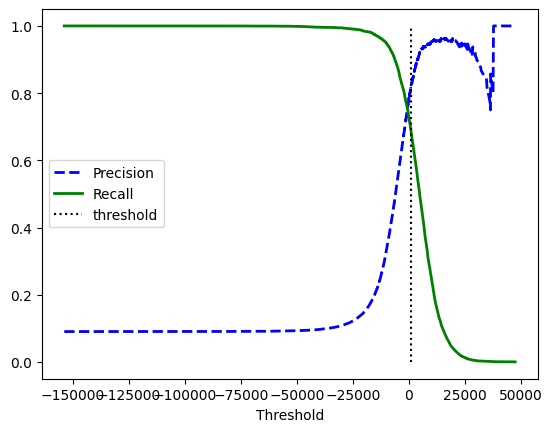

In [32]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel("Threshold")
plt.legend()
plt.show()

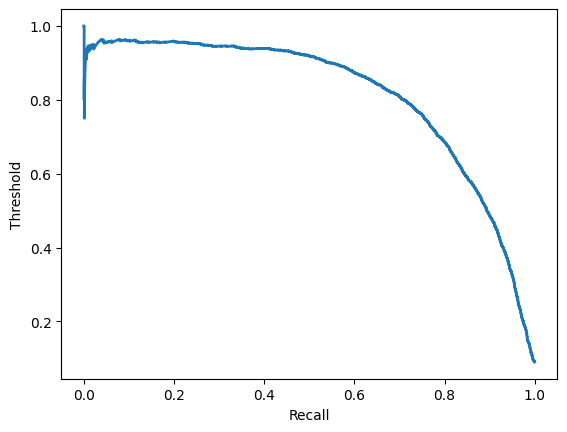

In [33]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Threshold")
plt.show()

In [34]:
idx_90_precision = (precisions >= 0.9).argmax()
threshold_90_precision = thresholds[idx_90_precision]

In [35]:
threshold_90_precision

3911.5667125871146

In [36]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [37]:
print(precision_score(y_train_1, y_train_pred_90)) #close to 0.9
recall_at_90_precision = recall_score(y_train_1,y_train_pred_90)
print(recall_at_90_precision)


0.900030385900942
0.5463936543073233


**ROC Curve**

In [38]:
from sklearn.metrics import roc_curve

In [39]:
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)

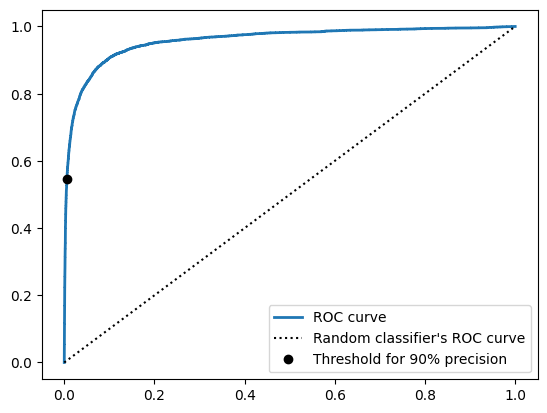

In [40]:
idx_threshold_at_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_threshold_at_90], fpr[idx_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_1, y_scores)

0.9588919573362955

**Tree**

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

In [43]:
y_p_forest = cross_val_predict(forest_model, x_train, y_train_1, cv=3, method="predict_proba")

In [44]:
y_p_forest[:5]

array([[0.11, 0.89],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [45]:
y_scores_forest = y_p_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_1, y_scores_forest)

In [46]:
precisions_forest

array([0.09035   , 0.15505849, 0.21522456, 0.27599205, 0.33401159,
       0.38787792, 0.44053724, 0.48976635, 0.5388756 , 0.57995919,
       0.61932667, 0.65594542, 0.68946964, 0.7173159 , 0.74514428,
       0.76840447, 0.78796351, 0.80532972, 0.82197261, 0.8394712 ,
       0.85402631, 0.86753884, 0.87973422, 0.89366019, 0.90160574,
       0.90949914, 0.91883855, 0.92544714, 0.93100983, 0.93569885,
       0.94078111, 0.94584705, 0.95001844, 0.95356612, 0.95700131,
       0.96011289, 0.96353276, 0.96802604, 0.97104806, 0.97316741,
       0.97492163, 0.97693672, 0.97743021, 0.97985238, 0.9821321 ,
       0.98304058, 0.9851626 , 0.98648649, 0.98723229, 0.98776695,
       0.98872416, 0.98968638, 0.99109981, 0.99168443, 0.99248605,
       0.99349241, 0.99365843, 0.99426808, 0.99442959, 0.99481164,
       0.995439  , 0.99540124, 0.99581784, 0.9957657 , 0.99641577,
       0.99660359, 0.99655257, 0.99725412, 0.99746771, 0.99794027,
       0.99816369, 0.99813433, 0.99837001, 0.99862145, 0.99859

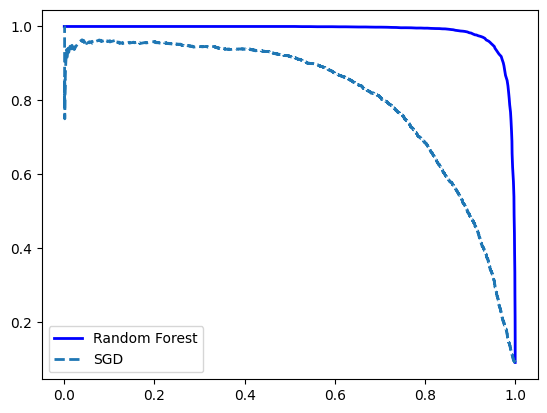

In [47]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth = 2, label="SGD")
plt.legend()
plt.show()

In [48]:
y_train_prediction_forest = y_p_forest[:,1] >= 0.5
print(f1_score(y_train_1, y_train_prediction_forest))
print(roc_auc_score(y_train_1,y_scores_forest)) #nice!

0.9275220372184133
0.9983756564760327


In [49]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train[:2000], y_train[:2000])

SVC()

In [50]:
svm_clf.predict([random_int])

array(['5'], dtype=object)

In [51]:
random_int_scores_svm = svm_clf.decision_function([random_int])
print(random_int_scores_svm)
print(random_int_scores_svm.argmax())

[[ 3.79297828  0.72949369  6.06184129  8.29800527 -0.29383983  9.30157597
   1.74723215  2.77365456  7.20601456  4.82245092]]
5


In [52]:
print(svm_clf.classes_)
print(svm_clf.classes_[random_int_scores_svm.argmax()])

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


In [53]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC())

In [54]:
ovr_clf.predict([random_int])

array(['5'], dtype='<U1')

In [55]:
len(ovr_clf.estimators_)

10

In [56]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([random_int])

array(['5'], dtype='<U1')

In [57]:
sgd_clf.decision_function([random_int])

array([[-19114.59299104, -33368.90013367,  -9514.52950867,
         -1987.26029947, -23309.06711213,   1338.64568737,
        -23866.95789642, -10273.88335965, -13551.73643178,
         -8137.4616516 ]])

In [58]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.88285, 0.8708 , 0.87205])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype("float64"))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

**Error Analysis**

In [60]:
#increase iterations
sgd_clf = SGDClassifier(max_iter=3000)

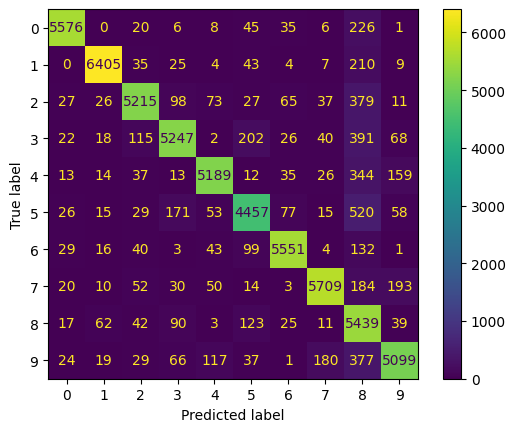

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_prediction = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_prediction)
plt.show()

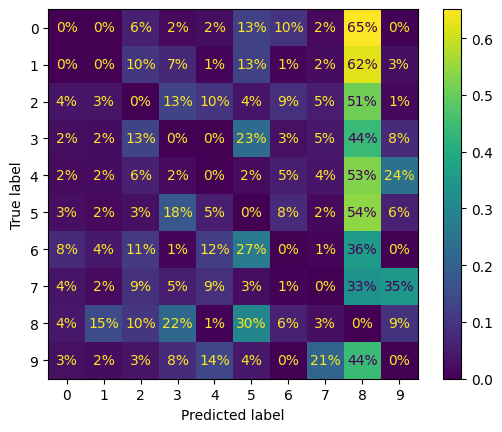

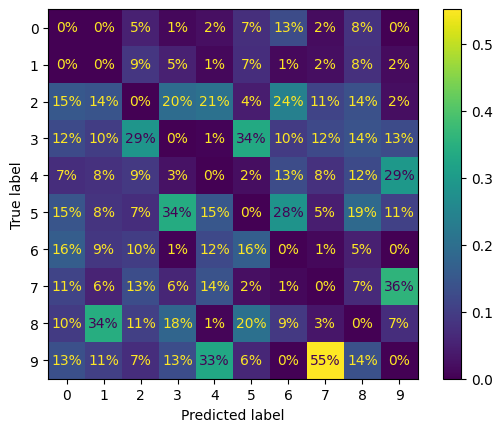

In [62]:
sample_weight = (y_train_prediction != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_prediction, sample_weight=sample_weight, normalize="true", values_format=".0%")
ConfusionMatrixDisplay.from_predictions(y_train,y_train_prediction, sample_weight=sample_weight, normalize="pred", values_format=".0%")

In [63]:
cl_a,cl_b = '3','5'
X_aa = x_train[(y_train == cl_a) & (y_train_prediction == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_prediction == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_prediction == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_prediction == cl_b)]

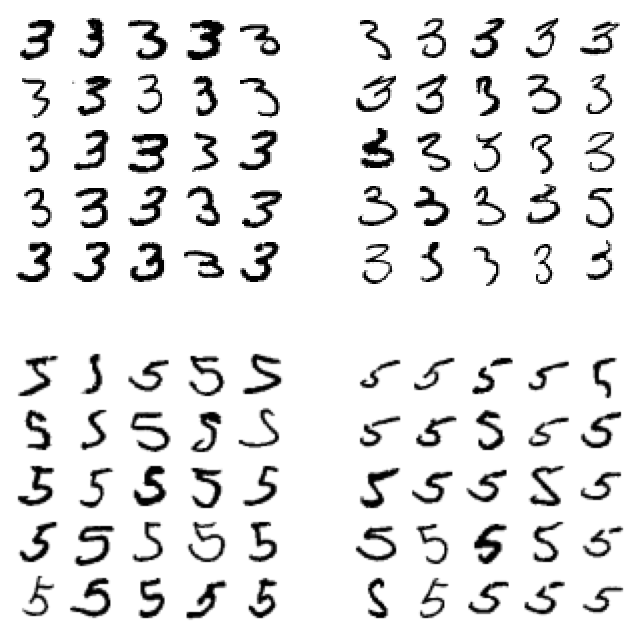

In [64]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digit(X_aa[:25], images_in_row=5)
plt.subplot(222); plot_digit(X_ab[:25], images_in_row=5)
plt.subplot(223); plot_digit(X_ba[:25], images_in_row=5)
plt.subplot(224); plot_digit(X_bb[:25], images_in_row=5)
plt.show()

**Multilabel Classification**

In [65]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [66]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [67]:
knn_clf.predict([random_int])

array([[False,  True]])

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [69]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3)
chain_clf.fit(x_train[:2000], y_multilabel[:2000])


ClassifierChain(base_estimator=SVC(), cv=3)

In [70]:
chain_clf.predict([random_int])

array([[0., 1.]])

**Multioutput Classifications**

In [71]:
noise = np.random.randint(0,100, (len(x_train),784))

In [72]:
noise

array([[37, 80, 96, ..., 23, 48, 65],
       [69, 55, 86, ..., 11, 96, 24],
       [85, 49, 22, ..., 24, 16, 12],
       ...,
       [38, 75, 86, ..., 23,  0, 68],
       [69, 54, 64, ..., 24, 80, 42],
       [94, 95, 48, ..., 73, 12, 54]])

In [73]:
noise = np.random.randint(0,100, (len(x_train),784))
x_train_noisy = x_train+noise
noise = np.random.randint(0,100, (len(x_test),784))
x_test_noisy = x_test+noise
y_train_noisy = x_train
y_test_noisy = x_test

In [74]:
print(x_train_noisy[0])
print(y_train_noisy)

[ 39.  32.  89.  12.  90.  15.  24.  73.  84.  89.  48.  93.  87.  62.
  89.   2.  66.  27.  87.  63.  39.   1.   3.  26.  16.  37.  42.  26.
  40.  34.  47.  57.  12.  43.   7.  38.  11.  36.  99.  85.  17.  33.
  50.  92.  33.  35.  97.  24.   8.  48.  74.   3.  87.  30.  96.  41.
  95.   4.   5.  67.  36.  46.  54.  70.  24.  77.   2.  19.   9.  11.
   7.  37.  38.   0.  61.  20.  52.   9.  99.  10.  38.  71.  56.  35.
  17.  16.  90.  41.  17.  68.  56.  20.  51.  40.   1.  74.  96.  27.
  30.  19.  48.   3.  90.  41.  18.  21.  75.  20.  82.  86.  69.  15.
  64.  98.  45.   2.   0.  32.   5.  89.   5.   6.  53.   5.  14.   4.
  64.  77.  80.  69.  16.   2.  38.  19.  29.  36.  31.  79.  39.  66.
  76.   5.  84.   1.  76.   1.  94.  49.   2.  52.  96.  78.  26. 113.
  70.  68. 151. 164. 179.  90. 196. 336. 260. 146.   8.   2.   2.  94.
  46.  18.  92.  73.  48.  33.  92.  70.  46.  76. 193. 183. 240. 305.
 307. 295. 342. 308. 304. 260. 298. 336. 237. 123.  20.  64.  83.  97.
  49. 

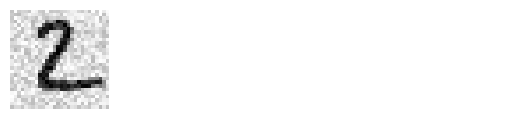

In [75]:
plot_digit(x_test_noisy[1].reshape(1,-1))

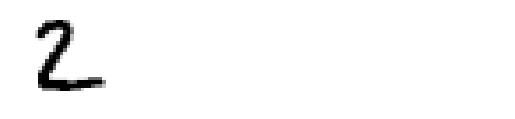

In [76]:
plot_digit(y_test_noisy[1].reshape(1,-1))

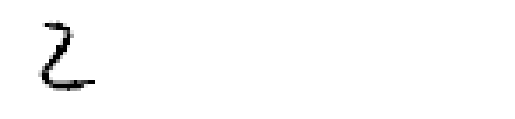

In [77]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_noisy, y_train_noisy)
clean_digit = knn_clf.predict([x_test_noisy[1]])
plot_digit(clean_digit)
plt.show()